# QuadratiK Usage Examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
import pandas as pd

## Normality Test

This section contains example for the Parametric and Non-parametric Normality Test based on kernel-based quadratic distances

### Parametric

In [2]:
from QuadratiK.kernel_test import KernelTest

data = np.random.randn(100, 2)

normality_test = KernelTest(h=0.4, centering_type="param", random_state=42).test(data)
print("Test : {}".format(normality_test.test_type_))
print("Execution time: {:.3f}".format(normality_test.execution_time))
print("H0 is Rejected : {}".format(normality_test.un_h0_rejected_))
print("Test Statistic : {}".format(normality_test.un_test_statistic_))
print("Critical Value (CV) : {}".format(normality_test.un_cv_))
print("Selected tuning parameter : {}".format(normality_test.h))

Test : Kernel-based quadratic distance Normality test
Execution time: 2.107
H0 is Rejected : False
Test Statistic : -116.93474728173035
Critical Value (CV) : 185.334479118873
Selected tuning parameter : 0.4


In [3]:
print(normality_test.summary())

Time taken for execution: 2.107 seconds
Test Results 
-----------------  ----------------------------------------------
Test Type          Kernel-based quadratic distance Normality test
Un Test Statistic  -116.93474728173035
Un Critical Value  185.334479118873
Un Reject H0       False
Vn Test Statistic  0.6315175347522548
Vn Critical Value  8.808524062653914
Vn Reject H0       False
Var Un             5.992919179649088e-06
-----------------  ----------------------------------------------
Summary Statistics 
           Feature 0    Feature 1
-------  -----------  -----------
Mean         -0.1156       0.034
Std Dev       0.8563       0.9989
Median       -0.0353       0.1323
IQR           1.0704       1.3333
Min          -2.6197      -1.9876
Max           1.8862       2.7202


### Non-parametric

In [4]:
normality_test = KernelTest(h=0.4, centering_type="nonparam").test(data)
print("Test : {}".format(normality_test.test_type_))
print("Execution time: {:.3f}".format(normality_test.execution_time))
print("H0 is Rejected : {}".format(normality_test.un_h0_rejected_))
print("Test Statistic : {}".format(normality_test.un_test_statistic_))
print("Critical Value (CV) : {}".format(normality_test.un_cv_))
print("Selected tuning parameter : {}".format(normality_test.h))

Test : Kernel-based quadratic distance Normality test
Execution time: 0.172
H0 is Rejected : False
Test Statistic : -116.93474728173035
Critical Value (CV) : 144.03077127316746
Selected tuning parameter : 0.4


In [5]:
print(normality_test.summary())

Time taken for execution: 0.172 seconds
Test Results 
-----------------  ----------------------------------------------
Test Type          Kernel-based quadratic distance Normality test
Un Test Statistic  -116.93474728173035
Un Critical Value  144.03077127316746
Un Reject H0       False
Vn Test Statistic  0.6315175347522548
Vn Critical Value  8.808524062653914
Vn Reject H0       False
Var Un             5.992919179649088e-06
-----------------  ----------------------------------------------
Summary Statistics 
           Feature 0    Feature 1
-------  -----------  -----------
Mean         -0.1156       0.034
Std Dev       0.8563       0.9989
Median       -0.0353       0.1323
IQR           1.0704       1.3333
Min          -2.6197      -1.9876
Max           1.8862       2.7202


### QQ Plot

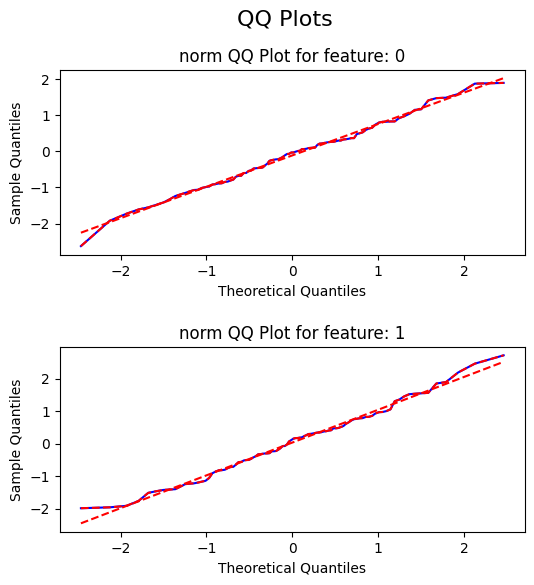

In [6]:
from QuadratiK.tools import qq_plot

qq_plot(data)

## Two Sample Test

This sections shows example for the two-sample test using normal kernel-based quadratic distance 

In [7]:
from QuadratiK.kernel_test import KernelTest

X = np.random.randn(100, 2)
Y = np.random.randn(100, 2)

two_sample_test = KernelTest(h=0.4, random_state=42).test(X, Y)
print("Test : {}".format(two_sample_test.test_type_))
print("Execution time: {:.3f}".format(two_sample_test.execution_time))
print("H0 is Rejected : {}".format(two_sample_test.un_h0_rejected_))
print("Test Statistic : {}".format(two_sample_test.un_test_statistic_))
print("Critical Value (CV) : {}".format(two_sample_test.un_cv_))
print("CV Method : {}".format(two_sample_test.cv_method_))
print("Selected tuning parameter : {}".format(two_sample_test.h))

Test : Kernel-based quadratic distance two-sample test
Execution time: 0.150
H0 is Rejected : [False False]
Test Statistic : [79.64380633 81.82980602]
Critical Value (CV) : [228.89244524 235.30628518]
CV Method : subsampling
Selected tuning parameter : 0.4


In [8]:
print(two_sample_test.summary())

Time taken for execution: 0.150 seconds
Test Results 
-----------------  -----------------------------------------------
Test Type          Kernel-based quadratic distance two-sample test
Un Test Statistic  [79.64380633 81.82980602]
Un Critical Value  [228.89244524 235.30628518]
Reject H0          [False False]
Var Un             [5.36771214e-05 1.28399708e-05]
-----------------  -----------------------------------------------
Summary Statistics 
                            Group 1    Group 2    Overall
------------------------  ---------  ---------  ---------
('Feature 0', 'Mean')        0.1282    -0.045      0.0416
('Feature 0', 'Std Dev')     1.0396     1.025      1.0334
('Feature 0', 'Median')      0.1056     0.0118     0.0737
('Feature 0', 'IQR')         1.4912     1.2409     1.345
('Feature 0', 'Min')        -3.2413    -2.4716    -3.2413
('Feature 0', 'Max')         2.3147     3.0789     3.0789
('Feature 1', 'Mean')        0.0435    -0.1263    -0.0414
('Feature 1', 'Std Dev')    

## K-Sample Test

Shows examples for the kernel-based quadratic distance k-sample tests with the Normal kernel and bandwidth
parameter h.

In [9]:
from QuadratiK.kernel_test import KernelTest

X = np.random.randn(500, 4)
y = np.repeat(np.array([1, 2, 3, 4, 5]), 100)

k_sample_test = KernelTest(h=1.5, method="subsampling").test(X, y)

print("Test : {}".format(k_sample_test.test_type_))
print("Execution time: {:.3f} seconds".format(k_sample_test.execution_time))
print("H0 is Rejected : {}".format(k_sample_test.un_h0_rejected_))
print("Test Statistic : {}".format(k_sample_test.un_test_statistic_))
print("Critical Value (CV) : {}".format(k_sample_test.un_cv_))
print("CV Method : {}".format(k_sample_test.cv_method_))
print("Selected tuning parameter : {}".format(k_sample_test.h))

0 88
0 88
0 88
88 181


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 93 is different from 88)

In [ ]:
y.shape

In [ ]:
print(k_sample_test.summary())

## Poisson Kernel Test

Shows example for perforing the the kernel-based quadratic distance Goodness-of-fit tests for Uniformity for
spherical data using the Poisson kernel with concentration parameter rho.

In [ ]:
from QuadratiK.tools import sample_hypersphere
from QuadratiK.poisson_kernel_test import PoissonKernelTest

X = sample_hypersphere(100, 3, random_state=42)

unif_test = PoissonKernelTest(rho=0.7, random_state=42).test(X)

print("Execution time: {:.3f} seconds".format(unif_test.execution_time))

print("U Statistic Results")
print("H0 is rejected : {}".format(unif_test.u_statistic_h0_))
print("Un Statistic : {}".format(unif_test.u_statistic_un_))
print("Critical Value : {}".format(unif_test.u_statistic_cv_))

print("V Statistic Results")
print("H0 is rejected : {}".format(unif_test.v_statistic_h0_))
print("Vn Statistic : {}".format(unif_test.v_statistic_vn_))
print("Critical Value : {}".format(unif_test.v_statistic_cv_))

In [ ]:
print(unif_test.summary())

### QQ Plot

In [ ]:
from QuadratiK.tools import qq_plot

qq_plot(X, dist="uniform")

## Poisson Kernel based Clustering

Shows example for performing the Poisson kernel-based clustering algorithm on the Sphere based on
the Poisson kernel-based densities.

In [ ]:
from QuadratiK.datasets import load_wireless_data
from QuadratiK.spherical_clustering import PKBC
from sklearn.preprocessing import LabelEncoder

X, y = load_wireless_data(return_X_y=True)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

cluster_fit = PKBC(num_clust=4, random_state=42).fit(X)
ari, macro_precision, macro_recall, avg_silhouette_Score = cluster_fit.validation(y)

print("Estimated mixing proportions :", cluster_fit.alpha_)
print("Estimated concentration parameters: ", cluster_fit.rho_)

print("Adjusted Rand Index:", ari)
print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Average Silhouette Score:", avg_silhouette_Score)

### Elbow Plot using Euclidean Distance and Cosine Similarity based WCSS

In [ ]:
wcss_euc = []
wcss_cos = []

for i in range(2, 10):
    clus_fit = PKBC(num_clust=i).fit(X)
    wcss_euc.append(clus_fit.euclidean_wcss_)
    wcss_cos.append(clus_fit.cosine_wcss_)

fig = plt.figure(figsize=(6, 4))
plt.plot(list(range(2, 10)), wcss_euc, "--o")
plt.xlabel("Number of Cluster")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Plot for Wireless Indoor Localization dataset")
plt.show()

fig = plt.figure(figsize=(6, 4))
plt.plot(list(range(2, 10)), wcss_cos, "--o")
plt.xlabel("Number of Cluster")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Plot for Wireless Indoor Localization dataset")
plt.show()

## Density Estimation and Sample Generation from PKBD

In [ ]:
from QuadratiK.spherical_clustering import PKBD

pkbd_data = PKBD().rpkb(10, [0.5, 0], 0.5, "rejvmf", random_state=42)
dens_val = PKBD().dpkb(pkbd_data, [0.5, 0.5], 0.5)
print(dens_val)

## Tuning Parameter $h$ selection

Computes the kernel bandwidth of the Gaussian kernel for the two-sample and ksample
kernel-based quadratic distance (KBQD) tests.

In [ ]:
from QuadratiK.kernel_test import select_h

X = np.random.randn(200, 2)
y = np.random.randint(0, 2, 200)

h_selected, all_values, power_plot = select_h(
    X, y, alternative="location", power_plot=True, random_state=None
)
print("Selected h is: ", h_selected)

In [ ]:
# shows the detailed power vs h table
all_values

In [ ]:
# shows the power plot
power_plot